##### ----------------------Notes---------------------
* This code uses regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.generate_figures import quick_map
from plants_and_TCR.process_data import regrid_and_process_datafiles
from plants_and_TCR.process_data import make_processed_data_dict
from plants_and_TCR.analyze_data import multi_model_stats
from plants_and_TCR.process_data import area_weighting

PATH_REGRIDDED_DATA = directory_information.DIR_PROCESSED_DATA
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

### Regrid Data

In [3]:
VARNAME='tas'

In [4]:
regrid_and_process_datafiles.process_data(varname=VARNAME)

tas_1pctCO2-rad_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
tas_1pctCO2-bgc_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
tas_1pctCO2_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
tas_piControl_CMIP5_bcc-csm1-1
Overwrite existing file: bilinear_64x128_192x288_peri.nc 
 You can set reuse_weights=True to save computing time.
using dimensions ('lat', 'lon') from data variable tas as the horizontal dimensions for this dataset.
tas_1pctCO

In [4]:
PROC_DATA_DICT = make_processed_data_dict.create_variable_dictionary(runnames=['piControl', '1pctCO2', 
                                                                               '1pctCO2-bgc', '1pctCO2-rad'],
                                                                     varname=VARNAME,
                                                                     input_path=PATH_REGRIDDED_DATA)

tas_1pctCO2-bgc_CMIP6_NorESM2-LM is not in the dictionary


### Calculations for Maps

In [5]:
RUNNAME_INDS=[2,0] #[1,3] #[2,0]
END_YR=70
VARNAME='tas'
CMIP_NAMES=['CMIP6']

In [6]:
[ds_all_models_phys,
 multimodelSum_phys,
 positiveChangeCount_phys,
 negativeChangeCount_phys,
 num_models_with_data_phys] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                            varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                            runname_inds=RUNNAME_INDS,
                                                            cmip_names = CMIP_NAMES) 

[ds_all_models_tot,
 multimodelSum_tot,
 positiveChangeCount_tot,
 negativeChangeCount_tot,
 num_models_with_data_tot] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                            varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                           runname_inds=[2,3],
                                                          cmip_names = CMIP_NAMES)

[ds_all_models_rad,
 multimodelSum_rad,
 positiveChangeCount_rad,
 negativeChangeCount_rad,
 num_models_with_data_rad] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                           varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                           runname_inds=[2,1],
                                                          cmip_names = CMIP_NAMES)

[ds_all_models_phys2,
 multimodelSum_phys2,
 positiveChangeCount_phys2,
 negativeChangeCount_phys2,
 num_models_with_data_phys2] = multi_model_stats.get_mm_mean(proc_data_dict=PROC_DATA_DICT,
                                                            varname=VARNAME,
                                                            end_yr=END_YR,
                                                            change_cutoff=0,
                                                             runname_inds=[1,3],
                                                            cmip_names = CMIP_NAMES)  #[1,3]

CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
No data for NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5
CNRM-ESM2-1
BCC-CSM2-MR
CanESM5
CESM2
GISS-E2-1-G
UKESM1-0-LL
GFDL-ESM4
IPSL-CM6A-LR
MIROC-ES2L
NorESM2-LM
No data for NorESM2-LM
MPI-ESM1-2-LR
ACCESS-ESM1-5


In [7]:
print(num_models_with_data_phys)
mostlyAgree = multi_model_stats.calculate_where_models_mostly_agree(positiveChangeCount_phys,
                                                                    negativeChangeCount_phys,
                                                                    cut_off_num = 8,
                                                                    num_models=num_models_with_data_phys)

12


### Make Figures

#### Figure 2a

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
../plants_and_TCR/generate_figures/quick_map.py:67: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


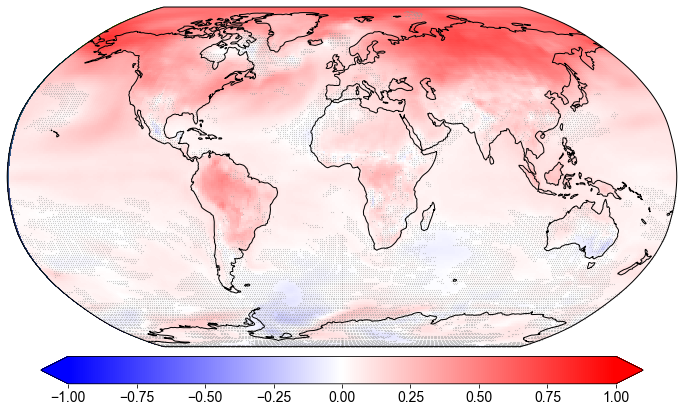

done saving file


(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fc062e65c18>)

In [8]:
import importlib
importlib.reload(quick_map)
quick_map.quick_map(ds_all_models_phys[VARNAME].mean(dim='modelname', skipna=True).values,
                    ds_all_models_phys['lat'].values,
                    ds_all_models_phys['lon'].values,
                    clim=[-1,1],
                    cmap=plt.cm.bwr,
                    sighatch=True,
                    sigmask=-mostlyAgree, #stippling where models do NOT agree
                    p=0,
                    markersize=0.025,
                    filepath=PATH_FIGURES+'Figure2a_multimodel_mean_map_Tas_2xCO2.png')

In [10]:
ds_avg = ds_all_models_phys[VARNAME].mean(dim='modelname', skipna=True)
ds_weighting = area_weighting.calculate_area_weightings('CESM1-BGC', regrid_on=False)
ds_weighting = ds_weighting.reindex_like(ds_avg, method='nearest', tolerance=0.01).load()

# Calculate land average
ds_avg_land = ds_avg*ds_weighting['land_weights']
ds_avg_land = ds_avg_land.sum(dim=['lat','lon']).values
print('Land Avg: '+str(ds_avg_land))

# Calculate ocean average
ds_avg_ocean = ds_avg*ds_weighting['ocean_weights']
ds_avg_ocean = ds_avg_ocean.sum(dim=['lat','lon']).values
print('Ocean Avg: '+str(ds_avg_ocean))

Land Avg: 0.22195200154839348
Ocean Avg: 0.08885772317896913


#### Figure 2b

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
../plants_and_TCR/generate_figures/quick_map.py:67: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


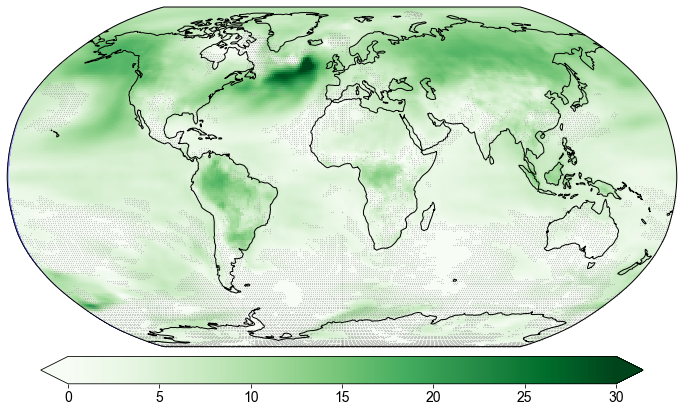

done saving file


(<Figure size 864x648 with 2 Axes>,
 <matplotlib.colorbar.Colorbar at 0x7fbff2381668>)

In [11]:
pct_mean_from_phys = (ds_all_models_phys['tas'].mean(dim='modelname', skipna=True)*100/
                      ds_all_models_tot['tas'].mean(dim='modelname', skipna=True))
quick_map.quick_map(pct_mean_from_phys.values,
                    pct_mean_from_phys['lat'].values,
                    pct_mean_from_phys['lon'].values,
                    clim=[0,30],
                    sighatch=True,
                    sigmask=-mostlyAgree, #stippling where models do NOT agree
                    p=0,
                    markersize=0.025,
                    cmap=plt.cm.Greens,
                    filepath=PATH_FIGURES+'Figure2b_percent_contribution_map_Tas_4xCO2.png')

In [12]:
ds_avg = pct_mean_from_phys
ds_weighting = area_weighting.calculate_area_weightings('CESM1-BGC', regrid_on=False)
ds_weighting = ds_weighting.reindex_like(ds_avg, method='nearest', tolerance=0.01).load()

# Calculate land average
ds_avg_land = ds_avg*ds_weighting['land_weights']
ds_avg_land = ds_avg_land.sum(dim=['lat','lon']).values
print('Land Avg: '+str(ds_avg_land))

# Calculate ocean average
ds_avg_ocean = ds_avg*ds_weighting['ocean_weights']
ds_avg_ocean = ds_avg_ocean.sum(dim=['lat','lon']).values
print('Ocean Avg: '+str(ds_avg_ocean))

Land Avg: 7.426078650216016
Ocean Avg: 4.517257717975188
